<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan colab ke drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd #library yg digunakan untk load data set
import numpy as np  #library yg digunakan untk load data set
import os           #library yg digunakan untk load data set serta pengolahan dlm bentuk array

import matplotlib.pyplot as plt #library untuk visualisasi data, untu mmbuat grafik
import cv2    #mengolah data citra dikenal dngn opencv

#library ini ada didlm stckt learn
from sklearn.model_selection import train_test_split  #digunakn untuk membgi data training dan dta testing
from sklearn.preprocessing import StandardScaler      #untuk mrubh skala nilainya
from sklearn.neighbors import KNeighborsClassifier    #library untk knn

#library yg dgunakan untk mnghitung nilai performa
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import math
#library untuk mengolah data/ blm pasti 
from skimage import io
from skimage import feature

In [3]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Pneumonia/')
print(pneumonia_data[:3])   #untuk mncetak hanya dta 3 trkhir sja
print(len(pneumonia_data)) #untuk mngethui bnyknya dt dlm vat

print('\n')
tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia/')
print(tidakPneumonia_data[:3])
print(len(tidakPneumonia_data))

['person26_bacteria_122.jpeg', 'person63_bacteria_306.jpeg', 'person69_bacteria_338.jpeg']
500


['IM-0656-0001.jpeg', 'IM-0655-0001.jpeg', 'IM-0652-0001-0002.jpeg']
500


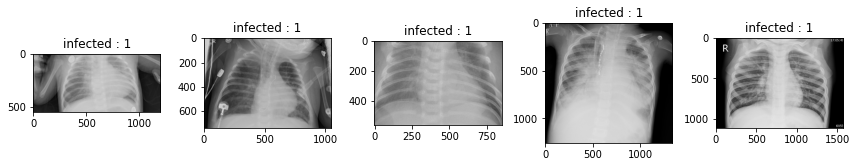

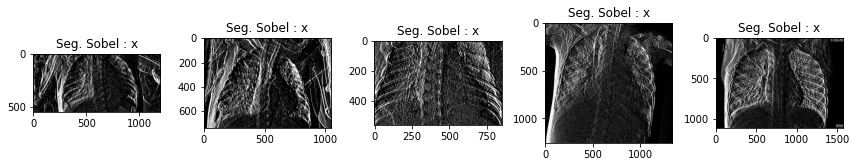

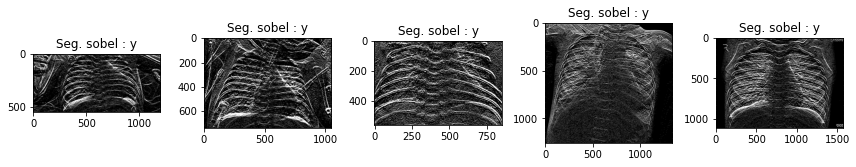

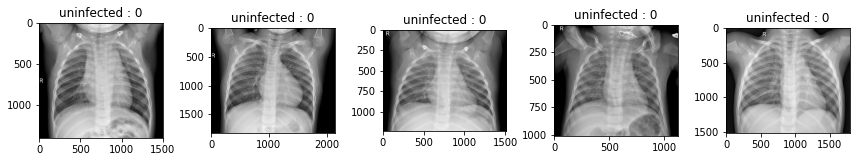

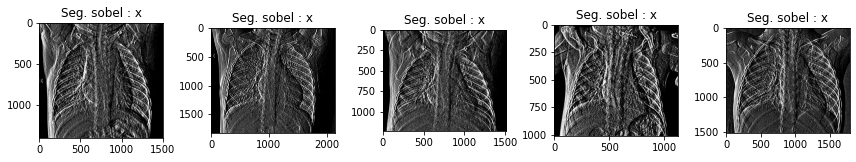

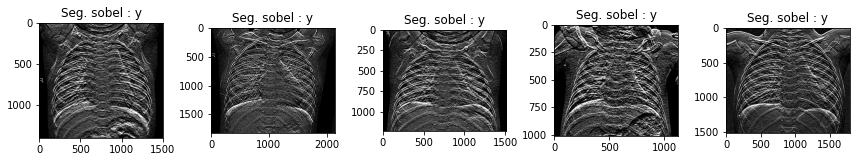

In [25]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi

#data asli pneumonia
plt.figure(figsize = (12,12))                #mengatur skala citra yg ditmpilkan dengan skala 12 12
for i in range(5):                           #melakukan perulangan sbnyk 5X (dgn nilai awal i=0 sampai i=4)
    plt.subplot(1, 5, i+1)                   #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img)               #menanmpilkan data dlm format abu2
    plt.title('infected : 1')                  #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()                        #tampilannya disesuaikan dgn lebar layar


#data sobel x pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)     
    edges = cv2.Sobel(img, cv2.CV_8U,1,0, ksize=5)           #proses segmentasi sobel 
    #plt.imshow(edges,cmap='gray')
    plt.imshow(edges)
    plt.title('Seg. Sobel : x')
    plt.tight_layout()


#data sobel y
plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" +pneumonia_data[i])
  gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  #img = cv2.GaussianBlur (gray, (3,3),0)
  edges = cv2.Sobel (img, cv2.CV_8U,0,1, ksize=5)
  #plt.imshow(edges,cmap='gray')
  plt.imshow(edges)
  plt.title ('Seg. sobel : y')
  plt.tight_layout()



#Tahap Visualisasi Citra Tidak Pneumonia
#data asli tdk pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,1,0, ksize=5)
    #plt.imshow(edges,cmap='gray')
    plt.imshow(edges)
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    #img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,0,1, ksize=5)
    plt.imshow(edges)
    #plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:

#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(len(pneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    edges = cv2.Sobel(img,cv2.CV_8U,1,0, ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten() #ektraksi yg dgunakan moment invariant, cv = opencv, edges var isi gmbar
    a = np.append(a,1) #np library untk mngolh data array
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range(len(tidakPneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    edges = cv2.Sobel(img,cv2.CV_8U,1,0, ksize=5)
    edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050.csv", x, fmt='%s',delimiter=',' )

In [30]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Actual
0    0.004466  8.961931e-06  1.234836e-08  ...  3.198644e-11 -6.295602e-18     1.0
1    0.003228  2.162545e-06  1.301684e-09  ...  1.251875e-12 -1.804455e-20     1.0
2    0.003184  1.890685e-06  2.820745e-10  ...  2.012647e-13 -2.060149e-20     1.0
3    0.003153  1.922017e-07  2.492227e-09  ... -3.837261e-13 -5.592650e-19     1.0
4    0.002898  9.551729e-07  9.570624e-10  ...  4.079172e-13 -1.535377e-19     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.002347  3.372099e-07  6.521460e-11  ...  3.396119e-14 -1.518286e-21     0.0
996  0.002301  5.166352e-08  6.528873e-11  ...  1.437134e-14 -1.250493e-21     0.0
997  0.002655  1.978180e-07  3.225760e-10  ...  8.186223e-14 -9.361962e-21     0.0
998  0.002564  4.405028e-08  1.298036e-10  ...  1.384484e-14  1.436434e-22     0.0
999  0.002695  2.714820e-08  3.286599e-11  ...  1.299993e-14 -2.436157e-22     0.0

In [31]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X) untuk split data
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

900
100
900
100
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.004466,8.961931e-06,1.234836e-08,1.071164e-08,1.230328e-16,3.198644e-11,-6.295602e-18
1,0.003228,2.162545e-06,1.301684e-09,9.489906e-10,1.054586e-18,1.251875e-12,-1.804455e-20
2,0.003184,1.890685e-06,2.820745e-10,1.776018e-10,3.399641e-20,2.012647e-13,-2.060149e-20
3,0.003153,1.922017e-07,2.492227e-09,8.752996e-10,-1.165562e-18,-3.837261e-13,-5.592650e-19
4,0.002898,9.551729e-07,9.570624e-10,5.314350e-10,3.465130e-19,4.079172e-13,-1.535377e-19
...,...,...,...,...,...,...,...
995,0.002347,3.372099e-07,6.521460e-11,6.154609e-11,3.591434e-21,3.396119e-14,-1.518286e-21
996,0.002301,5.166352e-08,6.528873e-11,6.500683e-11,4.046213e-21,1.437134e-14,-1.250493e-21
997,0.002655,1.978180e-07,3.225760e-10,1.840771e-10,4.386765e-20,8.186223e-14,-9.361962e-21
998,0.002564,4.405028e-08,1.298036e-10,6.800364e-11,6.387513e-21,1.384484e-14,1.436434e-22


0.0    452
1.0    448
Name: Actual, dtype: int64
1.0    52
0.0    48
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

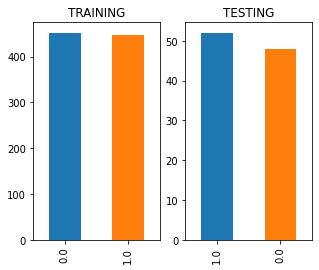

In [32]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value        

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,4)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(1,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(1,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [33]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-0.67710882, -0.59888949, -0.4609172 , ..., -0.19626053,
        -0.34160943,  0.20807087],
       [-0.79590904, -0.47552618, -0.50642102, ..., -0.19656595,
        -0.33425037,  0.20547824],
       [ 1.27577434,  0.91887671, -0.09421017, ..., -0.1638241 ,
         0.04888013, -0.15708604],
       ...,
       [-0.58738367, -0.61798515, -0.4971583 , ..., -0.19659689,
        -0.34151706,  0.20521807],
       [-0.94908464, -0.67493215, -0.50006206, ..., -0.19672455,
        -0.3465934 ,  0.20594483],
       [-0.59681431, -0.65794973, -0.30741497, ..., -0.19647886,
        -0.34539507,  0.20779566]])

In [34]:
math.sqrt(len(y_train))

30.0

In [35]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=30,p=2,metric='manhattan')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [36]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

In [37]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[48  0]
 [18 34]]
Akurasi : 0.82
presisi : [0.72727273 1.        ]
recall : [1.         0.65384615]
F-Measure : [0.84210526 0.79069767]


In [0]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 82, 84, 81, 83, 82, 81, 84]
p = [73, 83, 75, 78, 76, 78, 72, 80]
r = [81, 75, 96, 80, 90, 81, 91, 84]
f = [77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()

In [38]:
akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 19
[[47  1]
 [15 37]]
Akurasi : 0.84
presisi : [0.75806452 0.97368421]
recall : [0.97916667 0.71153846]
F-Score : [0.85454545 0.82222222]
--------------------------------------------
